In [75]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
import warnings  
warnings.filterwarnings('ignore')

In [76]:
dataset = pd.read_csv("kc_house_data.csv")

In [77]:
#This code counts unique values for each column in a dataset and prints the result for each column.
for value in dataset:  
    print('{},{} unique values'.format(value,dataset[value].nunique()))

price,3625 unique values
bedrooms,13 unique values
bathrooms,30 unique values
sqft_living,1038 unique values
sqft_lot,9782 unique values
floors,6 unique values
grade,12 unique values
sqft_above,946 unique values
sqft_basement,306 unique values
yr_built,116 unique values
yr_renovated,70 unique values
lat,5034 unique values
long,752 unique values
sqft_living15,777 unique values
sqft_lot15,8689 unique values
condition,5 unique values


<Figure size 720x432 with 0 Axes>

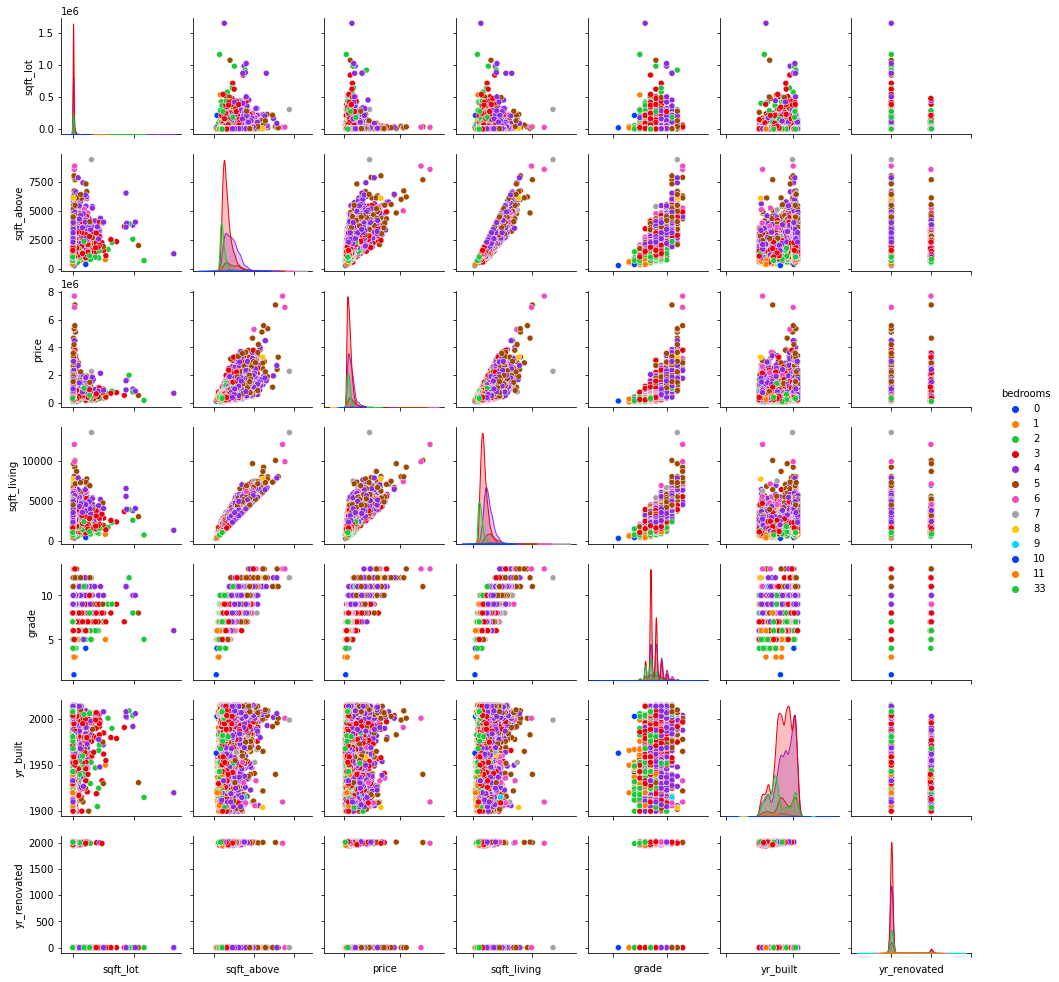

In [78]:
#This part of code creates a scatterplot matrix using the Seaborn library to visualize relationships between variables in a dataset. Draws the selected variants and colors the dots according to the number of bedrooms.
plt.figure(figsize=(10,6))     
sns.plotting_context('notebook',font_scale=1.2)
g = sns.pairplot(dataset[['sqft_lot','sqft_above','price','sqft_living','bedrooms','grade','yr_built','yr_renovated']]
                 ,hue='bedrooms',size=2, palette='bright')
g.set(xticklabels=[])

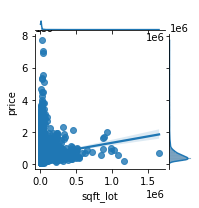

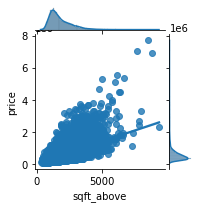

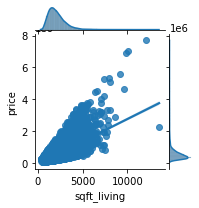

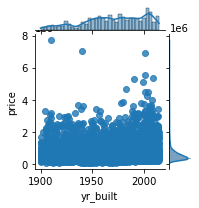

In [79]:
sns.jointplot(x='sqft_lot',y='price',kind='reg',data=dataset,size=3)
sns.jointplot(x='sqft_above',y='price',data=dataset,kind='reg',size=3)
sns.jointplot(x='sqft_living',y='price',data=dataset,kind='reg',size=3)
sns.jointplot(x='yr_built',y='price',data=dataset,kind='reg',size=3)

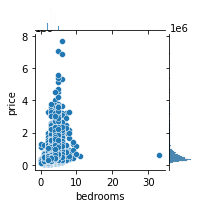

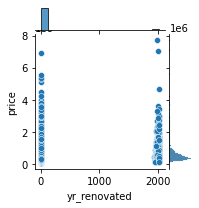

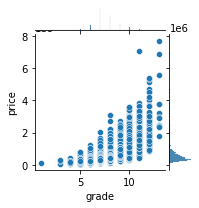

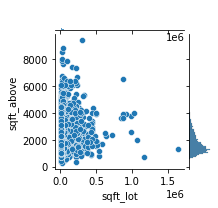

In [80]:
sns.jointplot(x='bedrooms',y='price',data=dataset,kind='scatter',size=3)
sns.jointplot(x='yr_renovated',y='price',data=dataset,kind='scatter',size=3)
sns.jointplot(x='grade',y='price',data=dataset,kind='scatter',size=3)
sns.jointplot(x='sqft_lot',y='sqft_above',data=dataset,kind='scatter',size=3)

<AxesSubplot:>

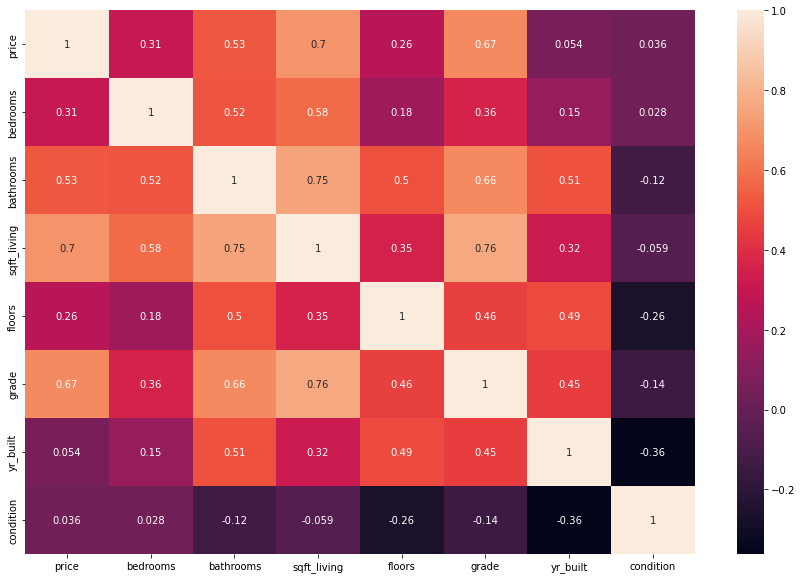

In [81]:
plt.figure(figsize=(15,10))
columns =['price','bedrooms','bathrooms','sqft_living','floors','grade','yr_built','condition']
sns.heatmap(dataset[columns].corr(),annot=True)

In [82]:
# X(Independent variables y(target variables) 
X = dataset.iloc[:,1:].values
y = dataset.iloc[:,0].values

In [83]:
#Splitting the data train,test data 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [84]:
rf_regressor = RandomForestRegressor(n_estimators=28,random_state=0)
rf_regressor.fit(X_train,y_train)
rf_regressor.score(X_test,y_test)
rf_pred =rf_regressor.predict(X_test)
rf_score=rf_regressor.score(X_test,y_test)
expl_rf = explained_variance_score(rf_pred,y_test)

In [85]:
print("Random Forest Regression Model Score is ",round(rf_regressor.score(X_test,y_test)*100))

Random Forest Regression Model Score is  86


In [86]:
evs = round(explained_variance_score(y_test, y_pred), 2)

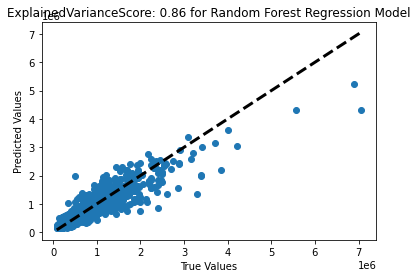

In [87]:
plt.scatter(y_test, rf_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', linewidth=3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('ExplainedVarianceScore: %.2f for Random Forest Regression Model' % evs)
plt.show()